# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1677603604085.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,02/27/2023,3982.24,--,3992.36,4018.05,3973.55
1,02/24/2023,3970.04,--,3973.24,3978.25,3943.08
2,02/23/2023,4012.32,--,4018.60,4028.30,3969.19
3,02/22/2023,3991.05,--,4001.83,4017.37,3976.90
4,02/21/2023,3997.34,--,4052.35,4052.35,3995.19
...,...,...,...,...,...,...
2536,03/06/2013,1541.46,--,1539.79,1545.25,1538.11
2537,03/05/2013,1539.79,--,1525.20,1543.47,1525.20
2538,03/04/2013,1525.20,--,1518.20,1525.27,1512.29
2539,03/01/2013,1518.20,--,1514.68,1519.99,1501.48


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2541.000000,2541.000000,2541.00000,2541.000000
mean,2773.168272,2754.618343,2769.56183,2738.408060
std,872.500021,909.123767,915.83534,901.791689
min,1514.680000,0.000000,0.00000,0.000000
25%,2061.020000,2058.190000,2067.65000,2045.500000
50%,2629.570000,2626.240000,2647.20000,2598.870000
75%,3349.160000,3350.920000,3368.95000,3328.820000
max,4796.560000,4804.510000,4818.62000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,2781.311911,2780.884072,2795.970048,2764.519221
std,872.483016,872.535985,879.141214,865.316183
min,1514.680000,1514.680000,1519.990000,1501.480000
25%,2063.590000,2063.450000,2073.990000,2052.090000
50%,2638.700000,2638.410000,2657.670000,2615.320000
75%,3360.470000,3360.500000,3379.970000,3336.250000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2540
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   object 
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [5]:
df.shape

(2517, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

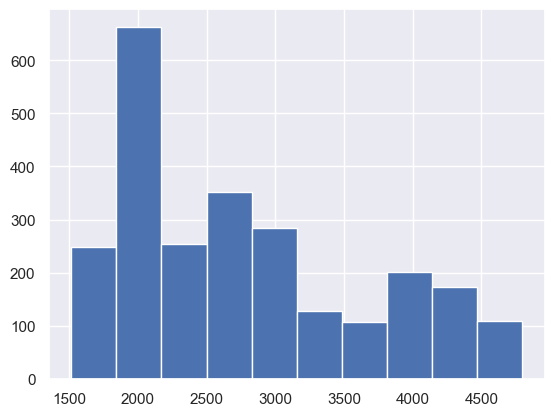

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3982.24

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2781.3119110051734

In [10]:
close_sd = df['Close/Last'].std()
close_sd

872.4830164468066

In [11]:
sigma1 = close_mean + close_sd
sigma1

3653.79492745198

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4526.277943898786

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

4962.519452122189

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-02-28 to 2023-02-27')

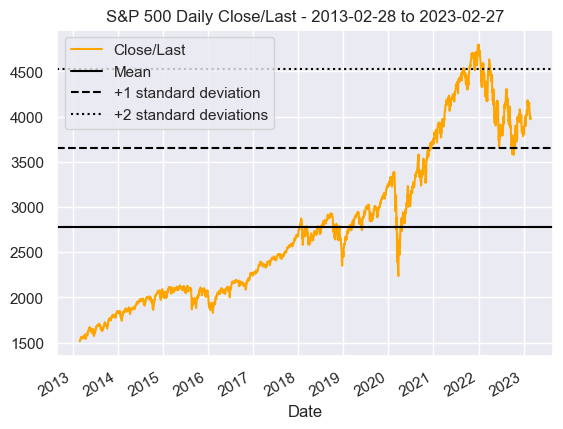

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-02-28 to 2023-02-27')

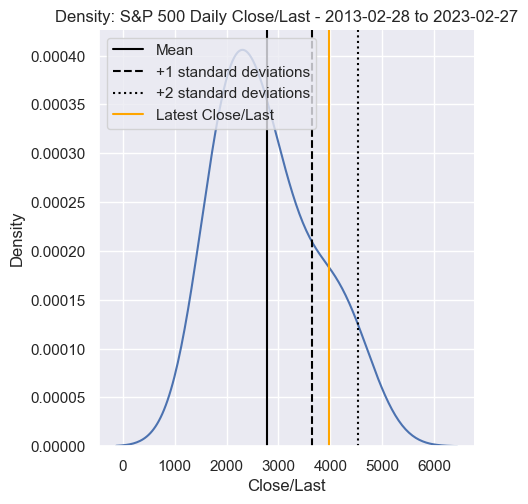

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.376448671614967

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results